In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import random

In [11]:
# Generate Hamiltonian
def ising_hamiltonian(L, J, h):
        pauli_x = np.array([[0,1],[1,0]])
        pauli_z = np.array([[1,0],[0,-1]])
        id = np.eye(2)

        sx_list = []
        sz_list = []
        for i_site in range(L):
                z_ops = [id] * L
                x_ops = [id] * L
                z_ops[i_site] = pauli_z
                x_ops[i_site] = pauli_x
                ZZ = z_ops[0]
                X =  x_ops[0]
                for j in range(1, L):
                        ZZ = np.kron(ZZ, z_ops[j])
                        X = np.kron(X, x_ops[j])
                sz_list.append(ZZ)
                sx_list.append(X)
        H_zz = np.zeros((2**L, 2**L))
        H_x = np.zeros((2**L, 2**L))

        for i in range(L-1):
                H_zz += np.matmul(sz_list[i], sz_list[(i + 1)])
                H_x += sx_list[i]

        H_x += sx_list[L-1]

        return np.matrix(-J * H_zz - h * H_x)

# Magnetization operator
def M(L):
        pauli_z = np.array([[1,0],[0,-1]])
        id = np.eye(2)

        sz_list = []
        for i_site in range(L):
                z_ops = [id] * L
                z_ops[i_site] = pauli_z
                Z = z_ops[0]
                for j in range(1, L):
                        Z = np.kron(Z, z_ops[j])
                sz_list.append(Z)
        H_z = np.zeros((2**L, 2**L))

        for i in range(L):
                H_z += sz_list[i]
        return np.matrix(H_z)/L

In [12]:
L = 8
h_list0 = 0.02 * np.random.rand(25000)
h_list1 = np.random.rand(25000) + 0.02

h_list = np.hstack((h_list0, h_list1))
random.shuffle(h_list)

M_op = M(L)
ground_energies = []
ground_states = []
magnetization = []
for h in h_list:
    energy, state = eigh(ising_hamiltonian(L, 1, h), eigvals_only = False)
    ground_energies.append(min(energy))
    ground_states.append(state[:, np.argmin(energy)])
    ket = np.transpose([ground_states[-1]])
    m = np.matmul(np.matrix(ket).H, np.matmul(M_op, ket))
    magnetization.append(m.item())
    



# plt.plot(h_list, ground_energies)   

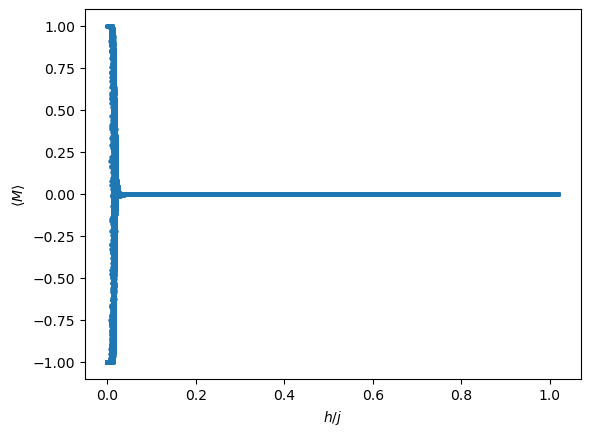

In [13]:
plt.scatter(h_list, magnetization, s=5)
plt.xlabel(r"$h/j$")
plt.ylabel(r"$\langle M\rangle$")
plt.show()

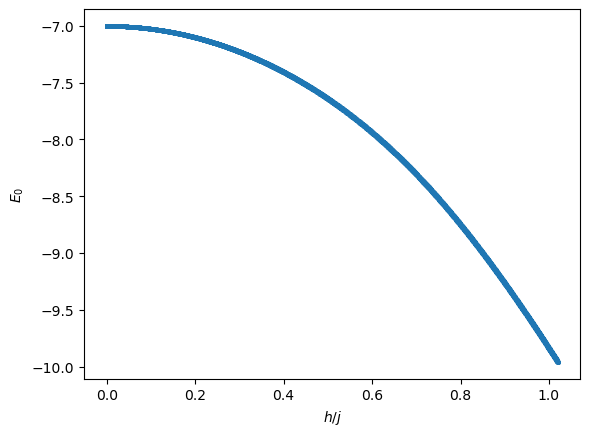

In [14]:
plt.scatter(h_list, ground_energies, s = 5)
plt.xlabel(r"$h/j$")
plt.ylabel(r"$E_0$")
plt.show()

In [4]:
phases = np.where(abs(np.array(magnetization))<0.05, 0, 1)
np.savez("Ising_dataset_large.npz", h_list = h_list, ground_states = ground_states, magnetization = magnetization, phases = phases)

NameError: name 'magnetization' is not defined

In [2]:
ising_data = np.load("Ising_dataset.npz")
len(ising_data['h_list'])

50000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


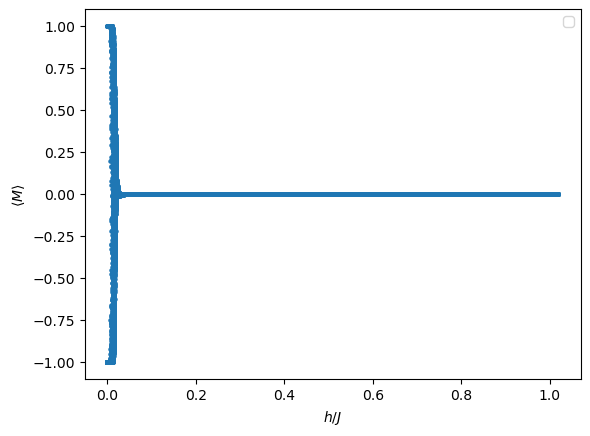

In [5]:
plt.scatter(ising_data['h_list'], ising_data['magnetization'], s = 5)
plt.xlabel(r"$h/J$")
plt.ylabel(r"$\langle M\rangle$")
plt.legend()
plt.savefig('plots/ising_order_parameter.pdf')
plt.show()